# CAPSTONE PROJECT

# Business Problem Understanding

# LOAN ELIGIBILITY STATUS

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:\\Users\\saisu\\OneDrive\\Documents\\LoanData.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#lets check the column names present in the dataset
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Data understanding

• Loan_ID: Unique Loan ID

• Gender: Male/Female

• Married: Applicant married

• Dependents: Number of dependents

• Education: Applicant Education

• Self_Employed: whether the applicant is Self employed

• ApplicantIncome: Applicant income

• CoapplicantIncome: Coapplicant income

• LoanAmount: Loan amount in thousands

• Loan_Amount_Term: Term of loan in months

• Credit History: credit history meets guidelines

• Property_Area: Urban/ Semi Urban/ Rural

• Loan_Status: Loan approved **target variable**

In [6]:
data['Loan_ID'].nunique()

614

In [7]:
data.drop(columns=['Loan_ID'],inplace=True)

In [8]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [9]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [15]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [16]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
data['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [19]:
data['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [20]:
data['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [21]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [22]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [23]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [24]:
data['Credit_History'] = data['Credit_History'].replace({1:"good",0:"bad"})

In [25]:
data['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [26]:
data['Credit_History'].value_counts()

good    475
bad      89
Name: Credit_History, dtype: int64

In [27]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [28]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [29]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [30]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [31]:
continous = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

discrete_categorical = ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

discrete_count = ['Dependents','Loan_Amount_Term']

# Exploratory Data Analysis(EDA)

**for continous variable**

In [32]:
data[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


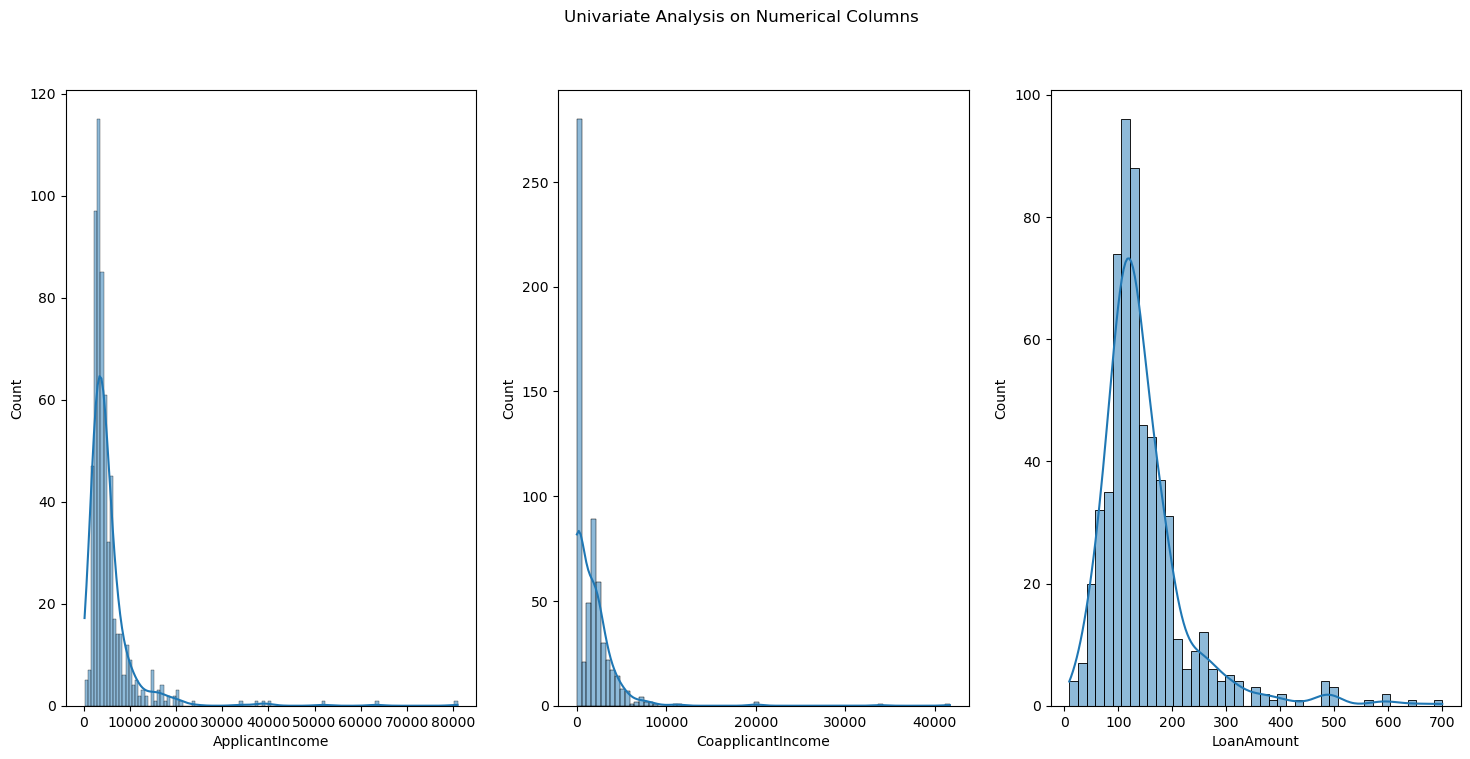

In [33]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,3,1)
sns.histplot(data['ApplicantIncome'],kde=True)

plt.subplot(1,3,2)
sns.histplot(data['CoapplicantIncome'],kde=True)

plt.subplot(1,3,3)
sns.histplot(data['LoanAmount'],kde=True)

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

In [34]:
data[continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

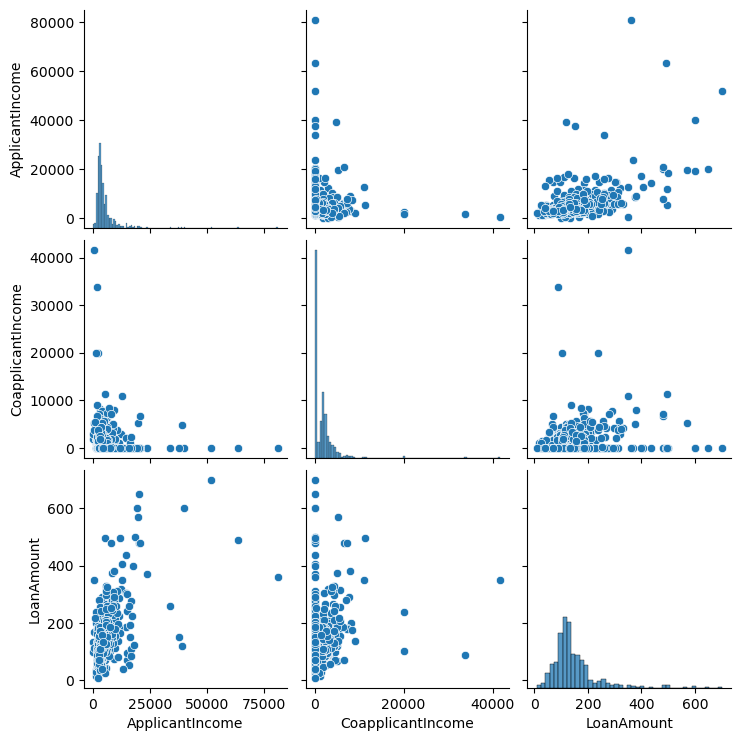

In [35]:
sns.pairplot(data[continous])
plt.show()

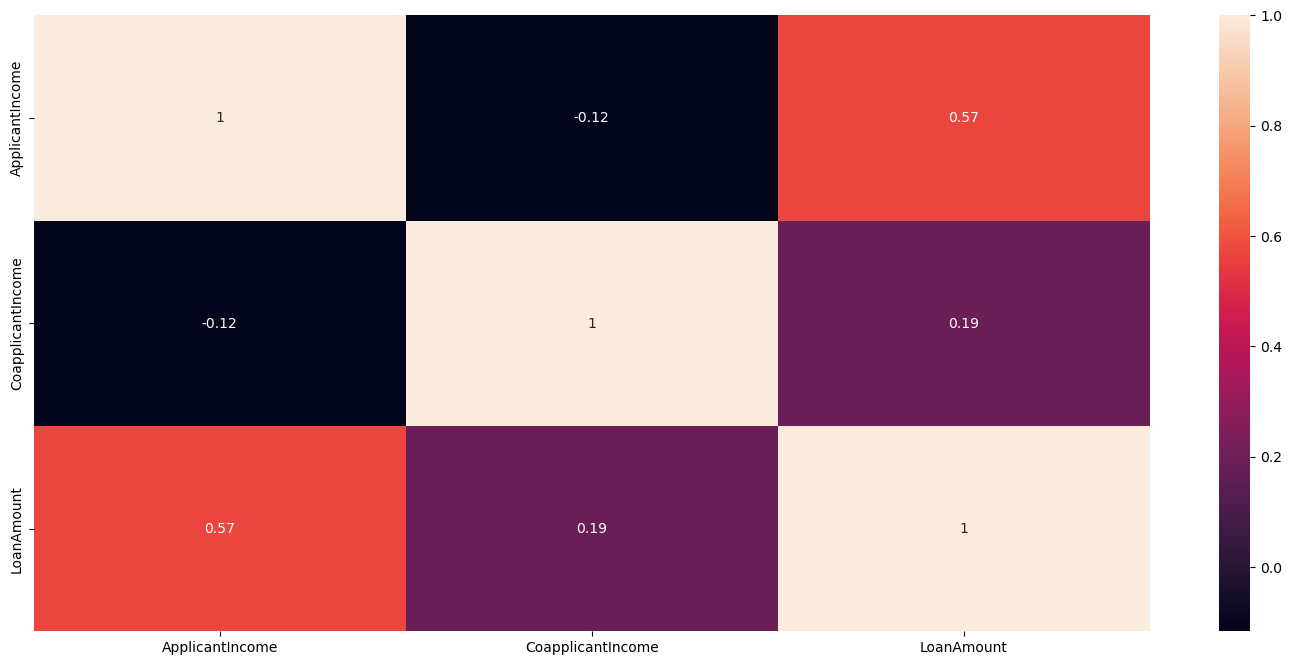

In [36]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

In [37]:
data[continous].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116605,0.570909
CoapplicantIncome,-0.116605,1.000000,0.188619
LoanAmount,0.570909,0.188619,1.000000


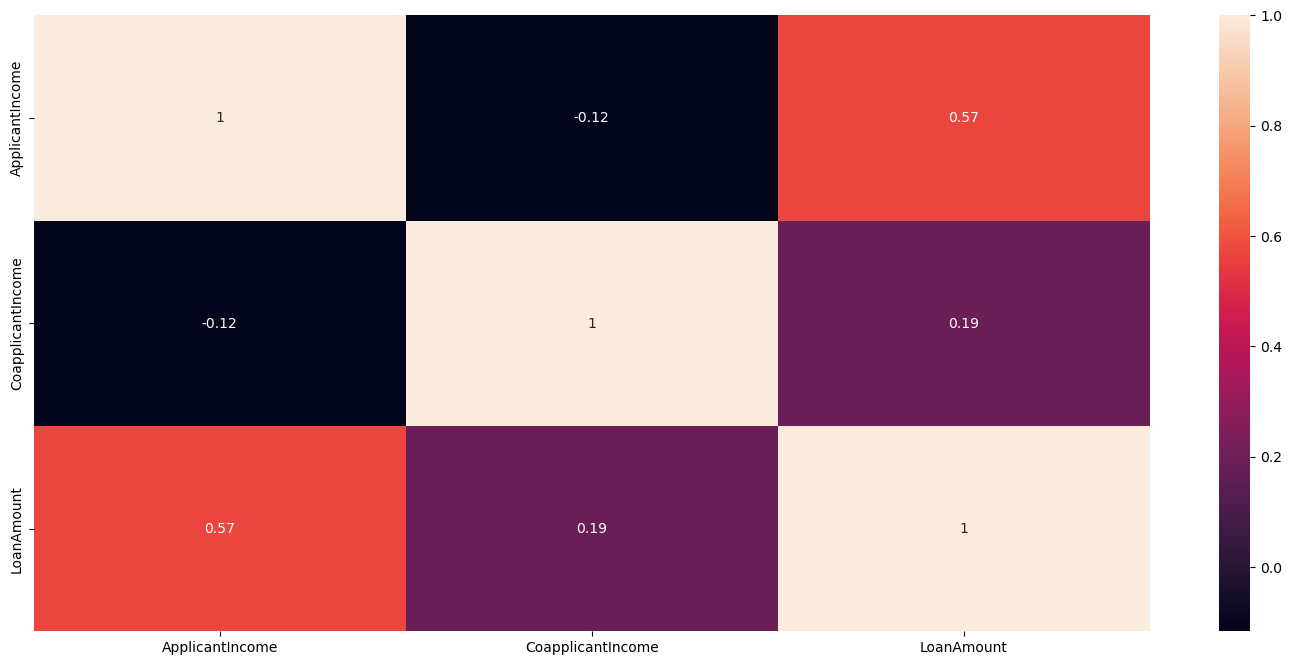

In [38]:
#lets visualize the outliners using box plot

sns.heatmap(data[continous].corr(),annot=True)
plt.show()




**for Discrete Variables**

In [39]:
data[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


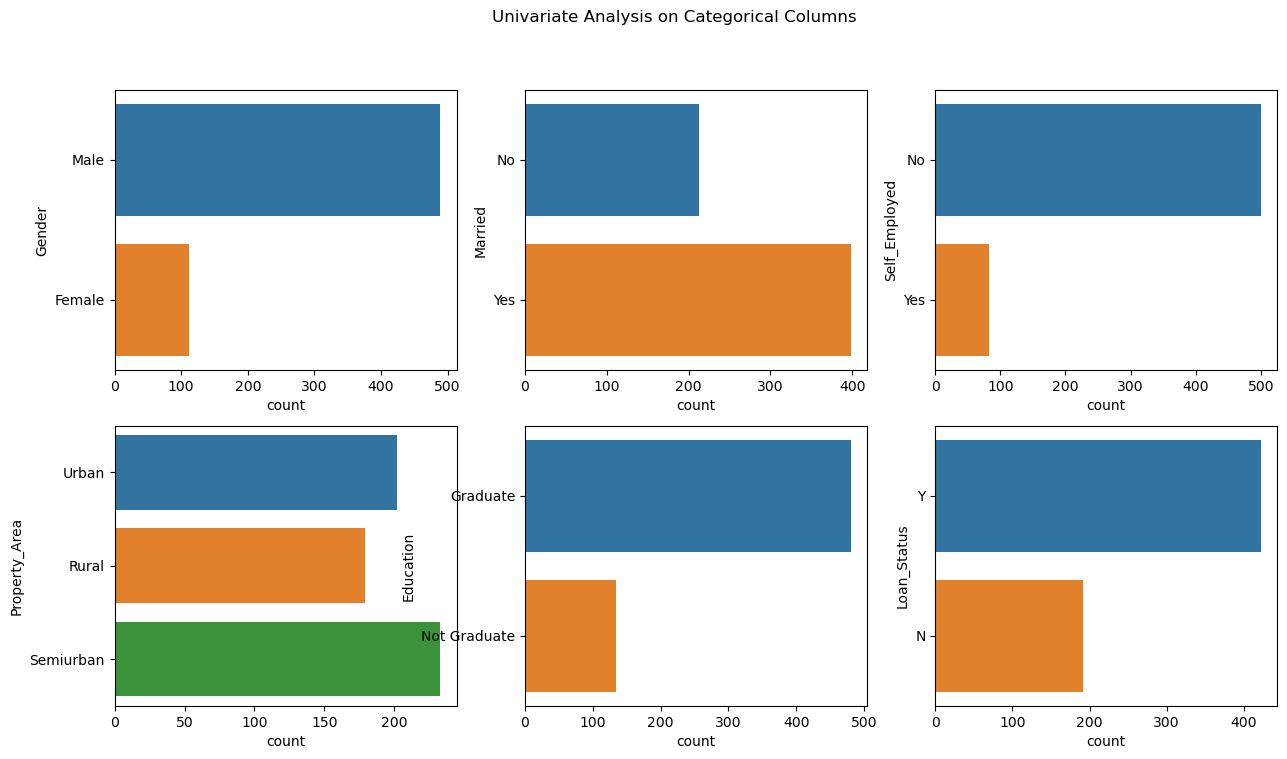

In [40]:
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(2, 3, 1)
sns.countplot(y=data['Gender'])

plt.subplot(2, 3, 2)
sns.countplot(y=data['Married'])

plt.subplot(2, 3, 3)
sns.countplot(y=data['Self_Employed'])

plt.subplot(2, 3, 4)
sns.countplot(y=data['Property_Area'])

plt.subplot(2, 3, 5)
sns.countplot(y=data['Education'])

plt.subplot(2, 3, 6)
sns.countplot(y=data['Loan_Status'])

plt.suptitle('Univariate Analysis on Categorical Columns ')
plt.show()

In [41]:
data["Income"] = data['ApplicantIncome'] + data['CoapplicantIncome']

data.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

# DATA PREPARATION 

**modifying the wrong data**

In [42]:
data['Dependents'] = data['Dependents'].replace({'3+':3})

**Missing values treatment**

In [43]:
#checking no.of missing values

data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [44]:
#checking for percentage of missing values 

data.isnull().sum()/len(data)*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

In [45]:
data = data.dropna(subset=["Income",'LoanAmount','Loan_Amount_Term','Credit_History'])

In [46]:
#count variable replace with 0 
data['Dependents'] = data['Dependents'].fillna(0)

In [47]:
#categorical variable replace with mode

data['Gender'] = data['Gender'].fillna(data["Gender"].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [48]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

**Outliers Treatment**

**Encoding**

In [49]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype('int')
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2}).astype('int')
data['Credit_History'] = data['Credit_History'].map({'good':1,'bad':0}).astype('int')
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')

**Data type conversion**

In [50]:
data['Dependents'] = data['Dependents'].astype('int')
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('int')

**Transformations**

In [51]:
data[['Income','LoanAmount']].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

In [52]:
#lets apply boxcox transformations to remove skewness

from scipy.stats import boxcox
data['Income'],a = boxcox(data['Income'])
data['LoanAmount'],c = boxcox(data['LoanAmount'])

In [53]:
data[['Income','LoanAmount']].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [54]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term']/12

**X & y**

In [55]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [56]:
X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
1,1,1,1,1,0,6.243267,30.0,1,0,1.864967
2,1,1,0,1,1,5.202610,30.0,1,2,1.856556
3,1,1,0,0,0,6.138816,30.0,1,2,1.862802
4,1,0,0,1,0,6.401083,30.0,1,2,1.864819
5,1,1,2,1,1,7.481930,30.0,1,2,1.868932
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,30.0,1,0,1.856069
610,1,1,3,1,0,4.460305,15.0,1,0,1.860675
611,1,1,1,1,0,7.388070,30.0,1,2,1.867771
612,1,1,2,1,0,6.870558,30.0,1,2,1.866991


**Identify the best random state number**

In [57]:
Train = []
Test = []
CV = []

for i in range(0,101):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    from sklearn.linear_model import LogisticRegression 
    log_default =  LogisticRegression()
    log_default.fit(X_train,y_train)
    
    ypred_train =  log_default.predict(X_train)
    ypred_test = log_default.predict(X_test)
    
    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(y_train, ypred_train))
    Test.append(accuracy_score(y_test, ypred_test))
    
    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(log_default, X_train, y_train, cv=5, scoring="accuracy").mean())

    
em = pd.DataFrame({"Train":Train, "Test":Test, "CV":CV})
gm = em[(abs(em['Train']-em['Test'])<=0.05) & (abs(em['Test']-em['CV'])<=0.05)]
rs = gm[gm["CV"]==gm["CV"].max()].index.to_list()[0]

print("best random_state number:",rs)

best random_state number: 70


**TRAIN - TEST - SPLIT**


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=70)

In [70]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
158,1,0,0,1,0,6.138816,30.0,1,0,1.863067
119,0,0,0,1,0,7.428854,30.0,1,2,1.869529
448,1,1,2,1,0,6.502836,30.0,0,0,1.863039
519,0,0,0,0,0,5.766309,30.0,1,0,1.858282
391,1,1,3,1,0,7.533593,30.0,1,0,1.868844
...,...,...,...,...,...,...,...,...,...,...
70,1,1,0,1,0,6.730146,30.0,1,2,1.865255
370,0,0,0,1,1,4.928045,30.0,1,1,1.872270
140,1,1,2,1,0,6.852435,30.0,1,0,1.866439
252,1,0,0,0,1,5.909606,30.0,1,0,1.862366


# MACHINE LEARNING MODELLING & EVALUATION

**1.LOGISTIC REGRESSION**

In [71]:
from sklearn.linear_model import LogisticRegression 
log_model =  LogisticRegression()
log_model.fit(X_train,y_train)

ypred_train =  log_model.predict(X_train)
ypred_test = log_model.predict(X_test)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("cross validation score:", cross_val_score(log_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))
    

Train Accuracy: 0.8226950354609929
cross validation score: 0.8227731092436976
Test Accuracy: 0.7830188679245284


**2.KNN**

In [60]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()
param_grid = {'n_neighbors':list(range(1,50))}

from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
knn_grid.fit(X_train,y_train)

knn_model = knn_grid.best_estimator_

ypred_train =  knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("cross validation score:", cross_val_score(knn_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))
    




Train Accuracy: 0.7541371158392435
cross validation score: 0.7375910364145659
Test Accuracy: 0.7075471698113207


**3.SUPPORT VECTOR MACHINE(SVM)**

In [75]:
from sklearn.svm import SVC

estimator = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}

from sklearn.model_selection import GridSearchCV
svm_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_grid.fit(X_train,y_train)

svm_model = svm_grid.best_estimator_

ypred_train =  svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("cross validation score:", cross_val_score(svm_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))
    




Train Accuracy: 0.8226950354609929
cross validation score: 0.8227731092436976
Test Accuracy: 0.7830188679245284


**4.DECISION TREE CLASSIFIER**

In [62]:
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state=rs)
param_grid = {"criterion":["gini","entropy"],
             "max_depth":list(range(1,16))}

from sklearn.model_selection import GridSearchCV
dt_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)
#identify the best model
dt = dt_grid.best_estimator_

#identify the importance of each feature 
dt_fi = dt.feature_importances_

#identify the features where the features importance is greater than 0

index = [i for i,x in enumerate(dt_fi) if x>0]

#create new dataset with important features
X_train_dt = X_train.iloc[:,index]
X_test_dt = X_test.iloc[:,index]

#train with best model & with important features

dt.fit(X_train_dt,y_train)

ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

#evaluate 

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("cross validation score:", cross_val_score(dt,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))
    


Train Accuracy: 0.8226950354609929
cross validation score: 0.8227731092436976
Test Accuracy: 0.7830188679245284


In [63]:
 dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=70)

In [64]:
X_train_dt

,Credit_History
158,1
119,1
448,0
519,1
391,1
...,...
70,1
370,1
140,1
252,1


**5.RANDOM FOREST CLASIFIER**

In [65]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=rs)
param_grid =  {"n_estimators":list(range(1,51))}

from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
rf_grid.fit(X_train,y_train)

#identify the best model
rf = rf_grid.best_estimator_

#identify the importance of each feature 
rf_fi = rf.feature_importances_

#identify the features where the features importance is greater than 0

index = [i for i,x in enumerate(rf_fi) if x>0]

#create new dataset with important features
X_train_rf = X_train.iloc[:,index]
X_test_rf = X_test.iloc[:,index]

#train with best model & with important features

dt.fit(X_train_rf,y_train)

ypred_train = rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)

#evaluate 

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("cross validation score:", cross_val_score(rf,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))
    


Train Accuracy: 0.9905437352245863
cross validation score: 0.8063025210084034
Test Accuracy: 0.7641509433962265


**6.ADABOOST CLASSIFIER**

In [66]:
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier(random_state=rs)
param_grid = {"n_estimators":list(range(1,51))}

from sklearn.model_selection import GridSearchCV
ab_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
ab_grid.fit(X_train,y_train)

#identify the best model
ab = ab_grid.best_estimator_

#identify the importance of each feature 
ab_fi = ab.feature_importances_

#identify the features where the features importance is greater than 0

index = [i for i,x in enumerate(ab_fi) if x>0]

#create new dataset with important features
X_train_ab = X_train.iloc[:,index]
X_test_ab = X_test.iloc[:,index]

#train with best model & with important features

ab.fit(X_train_ab,y_train)

ypred_train = ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)

#evaluate 

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("cross validation score:", cross_val_score(ab,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))
    

Train Accuracy: 0.83451536643026
cross validation score: 0.8322408963585435
Test Accuracy: 0.7641509433962265


**7.GRADIENT BOOST CLASSIFIER**

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
estimator =GradientBoostingClassifier (random_state=rs)
param_grid = {"n_estimators":list(range(1,10)),"learning_rate":[0.1,0.2,0.3,0.4,0.5,0.7,0.8]}

from sklearn.model_selection import GridSearchCV
gb_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
gb_grid.fit(X_train,y_train)

#identify the best model
gb = gb_grid.best_estimator_

#identify the importance of each feature 
gb_fi = gb.feature_importances_

#identify the features where the features importance is greater than 0

index = [i for i,x in enumerate(gb_fi) if x>0]

#create new dataset with important features
X_train_gb = X_train.iloc[:,index]
X_test_gb = X_test.iloc[:,index]

#train with best model & with important features

gb.fit(X_train_gb,y_train)

ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)

#evaluate 

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("cross validation score:", cross_val_score(gb,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))
    

Train Accuracy: 0.8392434988179669
cross validation score: 0.82515406162465
Test Accuracy: 0.7735849056603774


**8.XGBOOST CLASSIFIER**

In [68]:
from xgboost import XGBClassifier
estimator = XGBClassifier(random_state=rs)
param_grid = {"n_estimators":[10,20,40,100],"max_depth":[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}

from sklearn.model_selection import GridSearchCV
xgb_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
xgb_grid.fit(X_train,y_train)

#identify the best model
xgb = xgb_grid.best_estimator_

#identify the importance of each feature 
xgb_fi = xgb.feature_importances_

#identify the features where the features importance is greater than 0

index = [i for i,x in enumerate(xgb_fi) if x>0]

#create new dataset with important features
X_train_xgb = X_train.iloc[:,index]
X_test_xgb = X_test.iloc[:,index]

#train with best model & with important features

xgb.fit(X_train_xgb,y_train)

ypred_train = xgb.predict(X_train_xgb)
ypred_test = xgb.predict(X_test_xgb)

#evaluate 

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("cross validation score:", cross_val_score(xgb,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))
    

Train Accuracy: 0.8557919621749409
cross validation score: 0.8298599439775911
Test Accuracy: 0.7735849056603774


#chossing best model 
 
  model-name       good/bad       test_accuracy
 
1. lr              good                 78.3
2. knn              good               70.75
3. svm               good               78.3
4. dt                good               78.3
5. rf              bad(over fitting)    
6. ad                good               76.3
7. gb                  good              77.3
8. xgb                 good              77.3







note: we need to take knn,svm as last priority because it take more time

# BEST MODEL FOR THIS DATA SET IS DECISION TREE 